# Bresenham Line Rasterization Algorithm
## From Lecture Slides

In [162]:
import numpy as np
import matplotlib.pyplot as plt

class Canvas:
    def __init__(self, height, width):
        self.canvas = np.zeros((height, width))
        self.flipped = False

    def setPixel(self, x0, y0, c=1.0):
        self.canvas[x0, y0] = c

    def line(self, x0, y0, x1, y1):
        self.coords = [x0,y0,x1,y1]
        if (y1-y0)/(x1-x0) > 1:
            x0,y0 = y0,x0
            x1,y1 = y1,x1
            self.flipped = True

        F = lambda x, y: y*(x1-x0) + x*(y0-y1) + y1*x0 - y0*x1
        y = y0
        x = x0
        d = F(x0 + 1, y0 + 0.5)
        
        self.setPixel(x,y)
        while True:
            if x==x1 and y==y1: break
            
            if d < 0:
                # North East
                print("NE")
                y += 1
                d += (x1 - x0) + (y0 - y1)
                
            else:
                # East
                print("E")
                d = d + (y0 - y1)
            x += 1
            self.setPixel(x,y)
        

    def draw(self):
        plt.figure(figsize=(5,5))
        plt.imshow(self.canvas.T if not self.flipped else self.canvas, cmap='Greys', origin="lower")
        plt.plot([self.coords[0], self.coords[2]], 
                 [self.coords[1], self.coords[3]], 
                 "-", color="orange", linewidth=3)
        plt.grid(linestyle="--")
        plt.show()
        

E
NE
E
NE
E


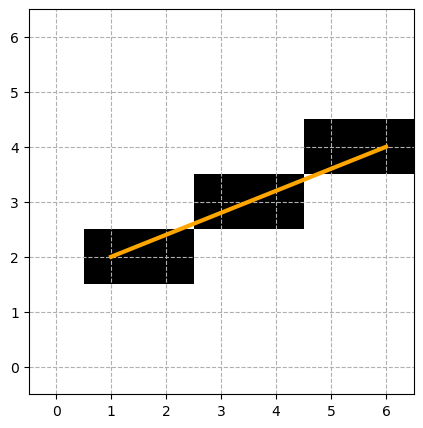

In [163]:
canvas = Canvas(7,7)
canvas.line(1,2,6,4)
canvas.draw()

NE
E
NE
NE


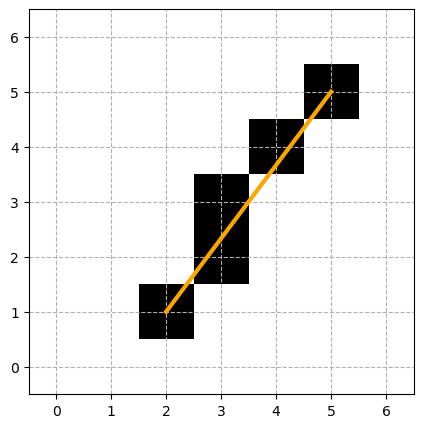

In [164]:
canvas = Canvas(7,7)
canvas.line(2,1,5,5)
canvas.draw()

In [179]:
import numpy as np
import matplotlib.pyplot as plt

class Canvas:
    def __init__(self, height, width):
        self.canvas = np.zeros((height, width))
        self.flipped=False

    def setPixel(self, x0, y0, c=1.0):
        self.canvas[x0, y0] = c

    def line(self, x0, y0, x1, y1):
        self.coords = [x0,y0,x1,y1]
        if (y1-y0)/(x1-x0) > 1:
            print("true")
            x0,y0 = y0,x0
            x1,y1 = y1,x1
            self.flipped=True

        dx = x1 - x0

        F = lambda x, y: y*(x1-x0) + x*(y0-y1) + y1*x0 - y0*x1
        y = y0
        x = x0
        d = F(x0 + 1, y0 + 0.5)
        self.setPixel(x,y)
        while x < x1-1:
            a = d/(2*dx)
            if d < 0:
                print(a, "NE")
                # North East
                if 0 >= a >= -1/2:
                    self.setPixel(x+1, y, 0.5+a )
                    self.setPixel(x+1, y+1, 0.5-a )
                if a < -1/2:
                    self.setPixel(x+1, y+1, 1.5+a )
                    self.setPixel(x+1, y+2, -0.5-a )
                y += 1
                d += (x1 - x0) + (y0 - y1)
                
            else:
                # East
                print(a, "E")
                if 0 <= a <= 1/2:
                    self.setPixel(x+1, y, 0.5+a )
                    self.setPixel(x+1, y+1, 0.5-a )
                if 1 >= a >= 1/2:
                    self.setPixel(x+1, y, 1.5-a )
                    self.setPixel(x+1, y-1, a - 0.5 )
                d = d + (y0 - y1)
            x += 1
        
        self.setPixel(x+1,y)


    def draw(self):
        plt.figure(figsize=(5,5))
        plt.imshow(self.canvas.T if not self.flipped else self.canvas, cmap='Greys', origin="lower")
        plt.plot([self.coords[0], self.coords[2]], 
                 [self.coords[1], self.coords[3]], 
                 "-", color="black", linewidth=3)
        plt.grid(linestyle="--")
        plt.show()
        

0.05 E
-0.15 NE
0.15 E
-0.05 NE


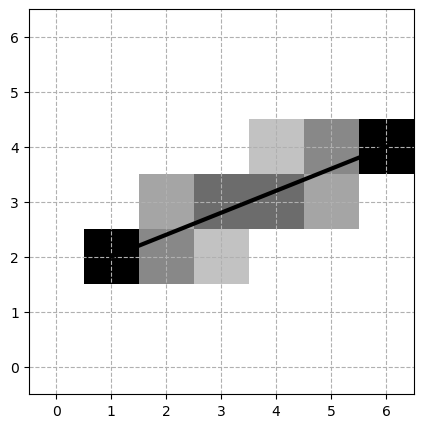

[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.55 0.45 0.   0.   0.  ]
 [0.   0.   0.35 0.65 0.   0.   0.  ]
 [0.   0.   0.   0.65 0.35 0.   0.  ]
 [0.   0.   0.   0.45 0.55 0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]]


In [180]:
canvas = Canvas(7,7)
canvas.line(1,2,6,4)
canvas.draw()
print(canvas.canvas)

## From Stack Overflow

In [167]:
import numpy as np
import matplotlib.pyplot as plt

class Canvas:
    def __init__(self, height, width):
        self.canvas = np.zeros((height, width))

    def setPixel(self, x0, y0):
        self.canvas[x0, y0] = 1

    def line(self, x0, y0, x1, y1):
        dx =  abs(x1 - x0)
        sx = 1 if x0 < x1 else -1
        dy = -abs(y1 - y0)
        sy = 1 if y0 < y1 else -1
        err = dx + dy
        e2 = 0 # error value e_xy */
        self.setPixel(x0, y0)
        while True:
            if (x0 == x1) and (y0 == y1): break
            e2 = 2 * err
            if e2 > dy: 
                print("East")
                err += dy
                x0 += sx # e_xy+e_x > 0 */
            if e2 < dx:
                print("NorthEast")
                err += dx
                y0 += sy # e_xy+e_y < 0 */
            self.setPixel(x0, y0)
    def draw(self):
        plt.pcolormesh(self.canvas.T, cmap='Greys')
        plt.grid()
        

East
East
NorthEast
East
East
NorthEast
East


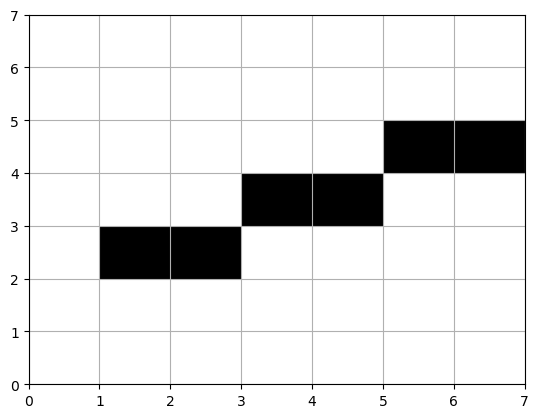

In [168]:
canvas = Canvas(7,7)
canvas.line(1,2,6,4)
canvas.draw()

East
NorthEast
NorthEast
East
NorthEast
East
NorthEast


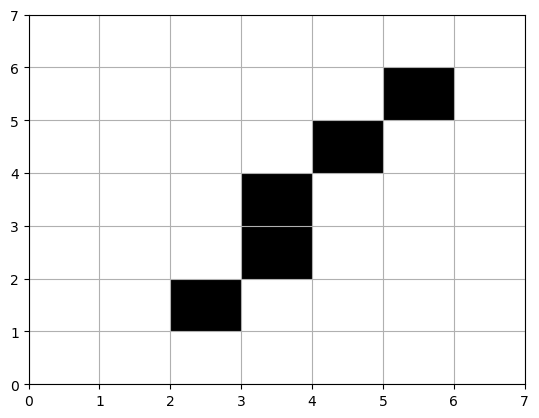

In [169]:
canvas = Canvas(7,7)
canvas.line(2, 1, 5, 5)
canvas.draw()

# Antialiasing according to Xiaolin/Wu

In [170]:
# integer part of x
def ipart(x):
    return np.floor(x)
def round(x):
    return ipart(x + 0.5)
# fractional part of x
def fpart(x):
    return x - ipart(x)
def rfpart(x):
    return 1 - fpart(x)

class AntiAliasedCanvas:
    def __init__(self, height, width):
        self.canvas = np.zeros((height, width))

    def setPixel(self, x0, y0, c):
        self.canvas[int(x0), int(y0)] = c

    def drawLine(self, x0,y0,x1,y1):
        steep = abs(y1 - y0) > abs(x1 - x0)
        
        if steep:
            x0, y0 = y0, x0 # swap(x0, y0)
            x1, y1 = y1, x1 # swap(x1, y1)
        
        if x0 > x1:
            x0, x1 = x1, x0 # swap(x0, x1)
            y0, y1 = y1, y0 # swap(y0, y1)
        
        dx = x1 - x0
        dy = y1 - y0

        if dx == 0.0:
            gradient = 1.0
        else:
            gradient = dy / dx

        # handle first endpoint
        xend = round(x0)
        yend = y0 + gradient * (xend - x0)
        xgap = rfpart(x0 + 0.5)
        xpxl1 = xend #  will be used in the main loop
        ypxl1 = ipart(yend)
        if steep:
            self.setPixel(ypxl1,   xpxl1, rfpart(yend) * xgap)
            self.setPixel(ypxl1+1, xpxl1,  fpart(yend) * xgap)
        else:
            self.setPixel(xpxl1, ypxl1  , rfpart(yend) * xgap)
            self.setPixel(xpxl1, ypxl1+1,  fpart(yend) * xgap)
        
        intery = yend + gradient # first y-intersection for the main loop
        
        # handle second endpoint
        xend = round(x1)
        yend = y1 + gradient * (xend - x1)
        xgap = fpart(x1 + 0.5)
        xpxl2 = xend # will be used in the main loop
        ypxl2 = ipart(yend)
        if steep:
            self.setPixel(ypxl2  , xpxl2, rfpart(yend) * xgap)
            self.setPixel(ypxl2+1, xpxl2,  fpart(yend) * xgap)
        else:
            self.setPixel(xpxl2, ypxl2,  rfpart(yend) * xgap)
            self.setPixel(xpxl2, ypxl2+1, fpart(yend) * xgap)
        
        # main loop
        if steep:
            for x in range(int(xpxl1 + 1), int(xpxl2)):
                    self.setPixel(ipart(intery)  , x, rfpart(intery))
                    self.setPixel(ipart(intery)+1, x,  fpart(intery))
                    intery = intery + gradient
        else:
            for x in range(int(xpxl1 + 1), int(xpxl2)):
                    self.setPixel(x, ipart(intery),  rfpart(intery))
                    self.setPixel(x, ipart(intery)+1, fpart(intery))
                    intery = intery + gradient
                    
    def draw(self):
        plt.pcolormesh(self.canvas.T, cmap='Greys')
        plt.grid()

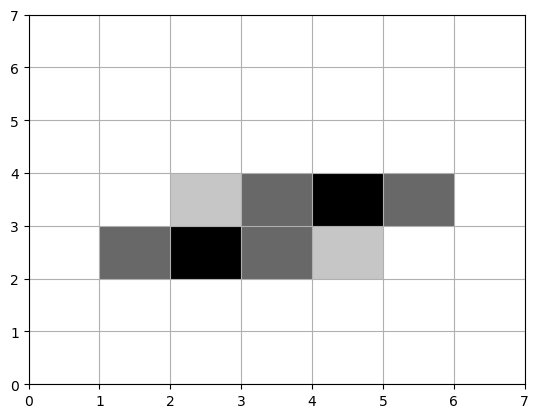

In [171]:
aacanvas = AntiAliasedCanvas(7,7)
aacanvas.drawLine(1,2,5,3)
aacanvas.draw()

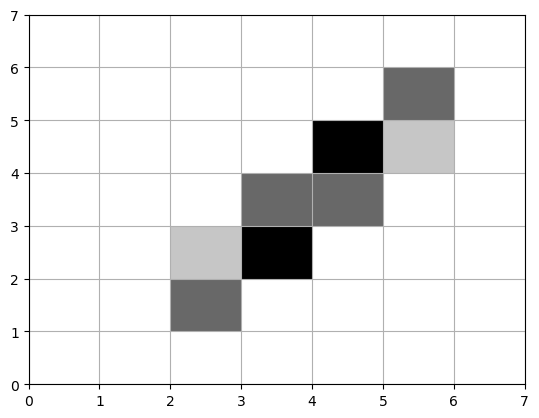

In [172]:
aacanvas = AntiAliasedCanvas(7,7)
aacanvas.drawLine(2,1,5,5)
aacanvas.draw()